In [1]:
!pip install transformers datasets matplotlib seaborn


In [6]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [7]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load dataset
dataset = load_dataset("dair-ai/emotion")

# Reduce dataset size
dataset = dataset.shuffle(seed=42)
dataset["train"] = dataset["train"].select(range(200))
dataset["test"] = dataset["test"].select(range(50))

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

# Correct tokenize function
def tokenize_function(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

# Tokenize
encoded_dataset = dataset.map(tokenize_function, batched=True)

# Rename & format
encoded_dataset = encoded_dataset.rename_column("label", "labels")
encoded_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [10]:
import pandas as pd

df_train = encoded_dataset["train"].to_pandas()
df_test = encoded_dataset["test"].to_pandas()
df_train.head()

,text,labels,input_ids,attention_mask
0,while cycling in the country,4,"[101, 2096, 9670, 1999, 1996, 2406, 102, 0, 0,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,i had pocket qq and was feeling pretty confide...,1,"[101, 1045, 2018, 4979, 1053, 4160, 1998, 2001...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
2,i am in no way complaining or whining or feeli...,0,"[101, 1045, 2572, 1999, 2053, 2126, 17949, 203...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,i feel a bit stressed because it feels like im...,3,"[101, 1045, 2514, 1037, 2978, 13233, 2138, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,i tell the people closest to me things that i ...,5,"[101, 1045, 2425, 1996, 2111, 7541, 2000, 2033...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


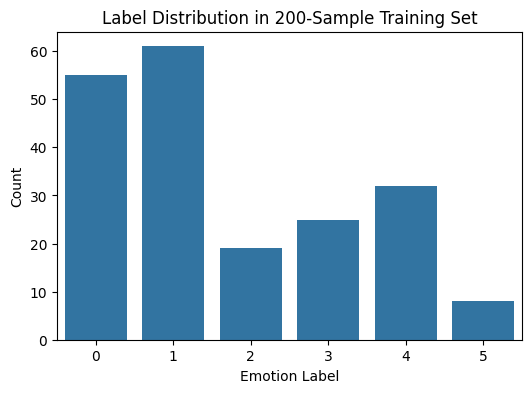

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df_train["labels"])
plt.title("Label Distribution in 200-Sample Training Set")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.show()

In [14]:
label_names = dataset["train"].features["label"].names
df_train["label_name"] = df_train["labels"].apply(lambda x: label_names[x])
df_train.head()

,text,labels,input_ids,attention_mask,label_name
0,while cycling in the country,4,"[101, 2096, 9670, 1999, 1996, 2406, 102, 0, 0,...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",fear
1,i had pocket qq and was feeling pretty confide...,1,"[101, 1045, 2018, 4979, 1053, 4160, 1998, 2001...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",joy
2,i am in no way complaining or whining or feeli...,0,"[101, 1045, 2572, 1999, 2053, 2126, 17949, 203...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",sadness
3,i feel a bit stressed because it feels like im...,3,"[101, 1045, 2514, 1037, 2978, 13233, 2138, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anger
4,i tell the people closest to me things that i ...,5,"[101, 1045, 2425, 1996, 2111, 7541, 2000, 2033...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",surprise


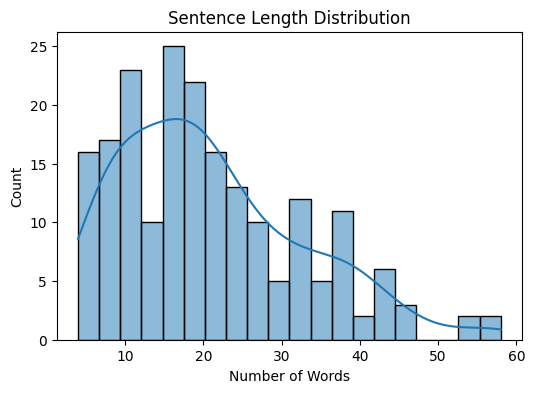

In [15]:
df_train["word_count"] = df_train["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(df_train["word_count"], bins=20, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.show()


In [16]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [18]:
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True)

tokenized_train = encoded_dataset["train"].map(tokenize, batched=True)
tokenized_test = encoded_dataset["test"].map(tokenize, batched=True)

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [19]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=6  # 6 emotion classes
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="emotion_model",
    report_to="none",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_strategy="no",
    save_strategy="no",
)

In [25]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"]
)

trainer.train()


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


TrainOutput(global_step=50, training_loss=1.686354522705078, metrics={'train_runtime': 695.5633, 'train_samples_per_second': 0.288, 'train_steps_per_second': 0.072, 'total_flos': 26495369625600.0, 'train_loss': 1.686354522705078, 'epoch': 1.0})

In [26]:
from transformers import pipeline

clf = pipeline("text-classification", model=model, tokenizer=tokenizer)

clf("I am very happy today!")


Device set to use cpu


[{'label': 'LABEL_1', 'score': 0.34106624126434326}]

Most Common Words in Training Data (Top 20):
     Word  Frequency
0    feel        138
1      my         59
2     was         39
3      so         34
4    with         33
5     for         32
6    have         31
7    like         29
8      am         28
9   about         28
10   just         28
11     be         26
12     as         21
13    not         21
14    but         21
15   this         21
16     if         19
17     on         19
18    you         19
19     at         18


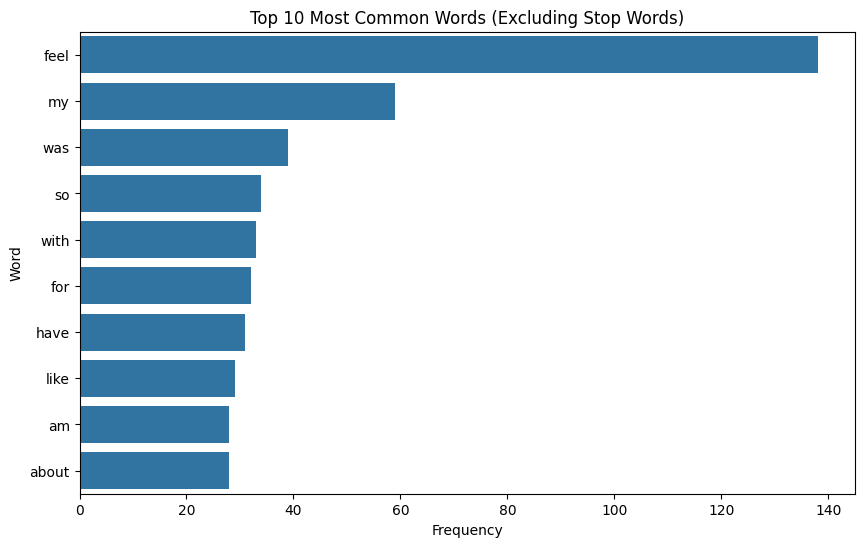

In [27]:
# Import Counter for word frequency calculation
from collections import Counter
import re # for simple text cleaning

# Function to flatten the text and count words
def get_most_common_words(df, n=20):
    all_text = ' '.join(df['text'].tolist()).lower()
    # Simple tokenization: split by space and remove punctuation
    words = re.sub(r'[^\w\s]', '', all_text).split()

    # Filter out common stop words (a basic list)
    # A more robust list of stop words would be better, but this is a quick example
    stop_words = set(['the', 'a', 'an', 'is', 'it', 'to', 'and', 'i', 'im', 'feeling', 'that', 'of', 'in', 'me'])
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

    return Counter(filtered_words).most_common(n)

# Get and display the 20 most common words in the training set
common_words = get_most_common_words(df_train)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

print("Most Common Words in Training Data (Top 20):")
print(df_common_words)

# Optional: Visualize the top 10 most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_common_words.head(10))
plt.title('Top 10 Most Common Words (Excluding Stop Words)')
plt.show()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


--- Classification Report on Test Set (50 examples) ---
              precision    recall  f1-score   support

     sadness       0.50      0.07      0.12        14
         joy       0.42      1.00      0.59        20
        love       0.00      0.00      0.00         4
       anger       0.00      0.00      0.00         7
        fear       0.00      0.00      0.00         5
    surprise       0.00      0.00      0.00         0

    accuracy                           0.42        50
   macro avg       0.15      0.18      0.12        50
weighted avg       0.31      0.42      0.27        50



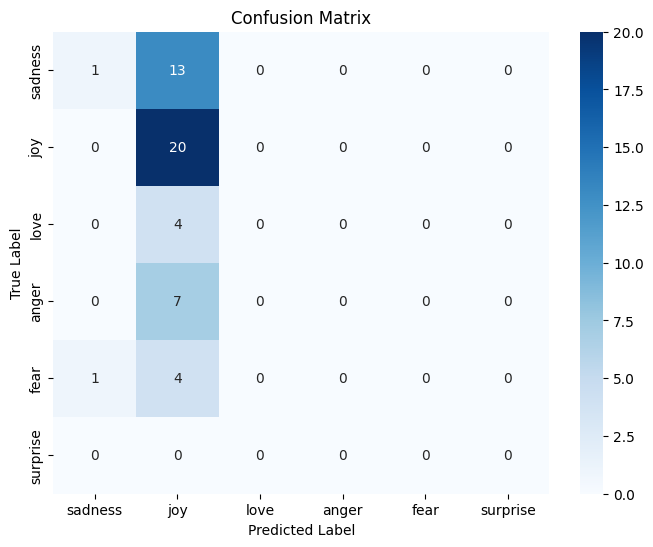

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Ensure these are imported earlier

# Define a function to compute metrics
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    f1_weighted = f1_score(labels, predictions, average='weighted', zero_division=0)

    return {'accuracy': accuracy, 'f1_weighted': f1_weighted}


# Get predictions on the test set
test_results = trainer.predict(encoded_dataset["test"])
predictions = np.argmax(test_results.predictions, axis=1)

# Corrected: Access the label column using 'labels'
true_labels = encoded_dataset["test"]["labels"]

# Get the list of label names (6 names: 'anger', 'fear', 'joy', 'love', 'sadness', 'surprise')
target_label_names = dataset['train'].features['label'].names

# Get the list of all expected numeric class IDs (0, 1, 2, 3, 4, 5)
# This handles the case where one class is missing from the 'true_labels'
all_numeric_labels = list(range(len(target_label_names)))

# Generate Classification Report
# *** NEW FIX: Pass the 'labels' parameter with all 6 numeric class IDs ***
report = classification_report(
    true_labels,
    predictions,
    target_names=target_label_names,
    labels=all_numeric_labels, # Force the report to use all 6 classes
    zero_division=0
)
print("--- Classification Report on Test Set ({} examples) ---".format(len(true_labels)))
print(report)

# Generate and plot Confusion Matrix
conf_mat = confusion_matrix(true_labels, predictions, labels=all_numeric_labels) # Use the full list of labels here too
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_label_names,
            yticklabels=target_label_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()